# 2015年台南地區登革熱疫情資料集
## import library

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
#decision tree and plot tree's structure
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.externals.six import StringIO   
from sklearn.tree import export_graphviz
import pydotplus

# LogisticRegression
from sklearn.linear_model import LogisticRegression

#SVM
from sklearn.svm import SVC

# get accuracy score
from sklearn.metrics import accuracy_score
# standardlize
from sklearn.preprocessing import StandardScaler

#draw
import seaborn as sns, numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from numpy.random import randn


In [2]:
data = pd.read_excel('dgcase.xlsx')
print(data.shape)
data.describe()

(4069, 8)


,age,sex,is_hospitalization,Fatal
count,4069.000000,4069.000000,4069.000000,4069.000000
mean,48.018924,0.504547,0.137134,0.009093
std,21.540725,0.500041,0.344031,0.094935
min,0.000000,0.000000,0.000000,0.000000
25%,29.000000,0.000000,0.000000,0.000000
50%,50.000000,1.000000,0.000000,0.000000
75%,66.000000,1.000000,0.000000,0.000000
max,98.000000,1.000000,1.000000,1.000000


## 年齡分佈

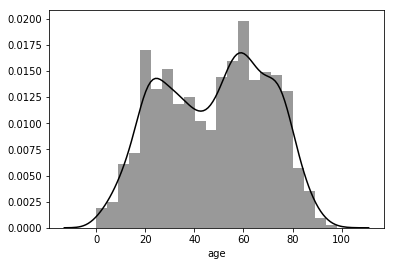

In [3]:
sns.distplot(data['age'], color = 'black')

## 住院比例

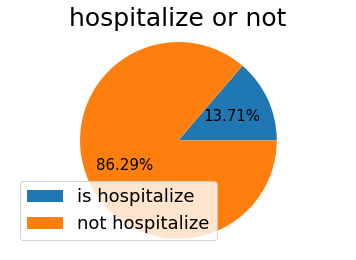

In [4]:
nhos = data['is_hospitalization'].value_counts()[0]
hos = data['is_hospitalization'].value_counts()[1]
label = ['is hospitalize', 'not hospitalize']

plt.pie([hos, nhos], autopct='%1.2f%%', textprops = {'fontsize':15})
plt.axis('equal')
plt.title('hospitalize or not', fontsize = '25')
plt.legend(label, fontsize = '18')
plt.show()


## 性別比例

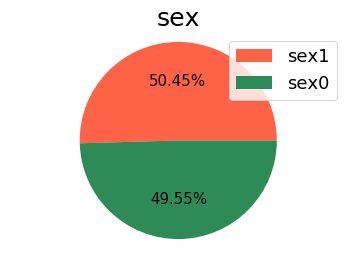

In [5]:
sex1 = data['sex'].value_counts()[1]
sex0 = data['sex'].value_counts()[0]
label = ['sex1', 'sex0']

plt.pie([sex1, sex0], autopct='%1.2f%%', textprops = {'fontsize':15}, colors = ['tomato', 'seagreen'])
plt.axis('equal')
plt.title('sex', fontsize = '25')
plt.legend(label, fontsize = '18')
plt.show()


## 生存死亡比例

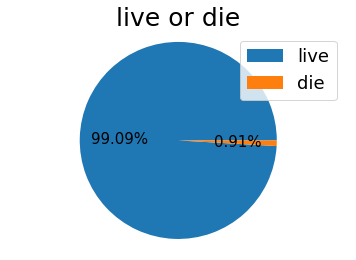

In [6]:
die = data['Fatal'].value_counts()[1]
live = data['Fatal'].value_counts()[0]
label = ['live', 'die']

plt.pie([live, die], autopct='%1.2f%%', textprops = {'fontsize':15})
plt.axis('equal')
plt.title('live or die', fontsize = '25')
plt.legend(label, fontsize = '18')
plt.show()


In [7]:
AST = pd.read_excel('dgcase.xlsx', 'AST')
AST = AST.sort_values(by = ['chartno'])
print("AST")
print(AST.shape)
ALT = pd.read_excel('dgcase.xlsx', 'ALT')
print("ALT")
print(ALT.shape)
APTT = pd.read_excel('dgcase.xlsx', 'APTT')
print("APTT")
print(APTT.shape)
Platelet = pd.read_excel('dgcase.xlsx', 'Platelet')
print("Platelet")
print(Platelet.shape)

AST
(5864, 4)
ALT
(8240, 4)
APTT
(2427, 4)
Platelet
(3682, 4)


In [8]:
AST.describe()

,type,Day,value
count,5864.000000,5864.000000,5864.000000
mean,0.989768,3.577251,184.649045
std,0.100643,2.186784,809.334448
min,0.000000,0.000000,15.000000
25%,1.000000,2.000000,40.000000
50%,1.000000,4.000000,61.000000
75%,1.000000,5.000000,114.000000
max,1.000000,7.000000,14774.000000


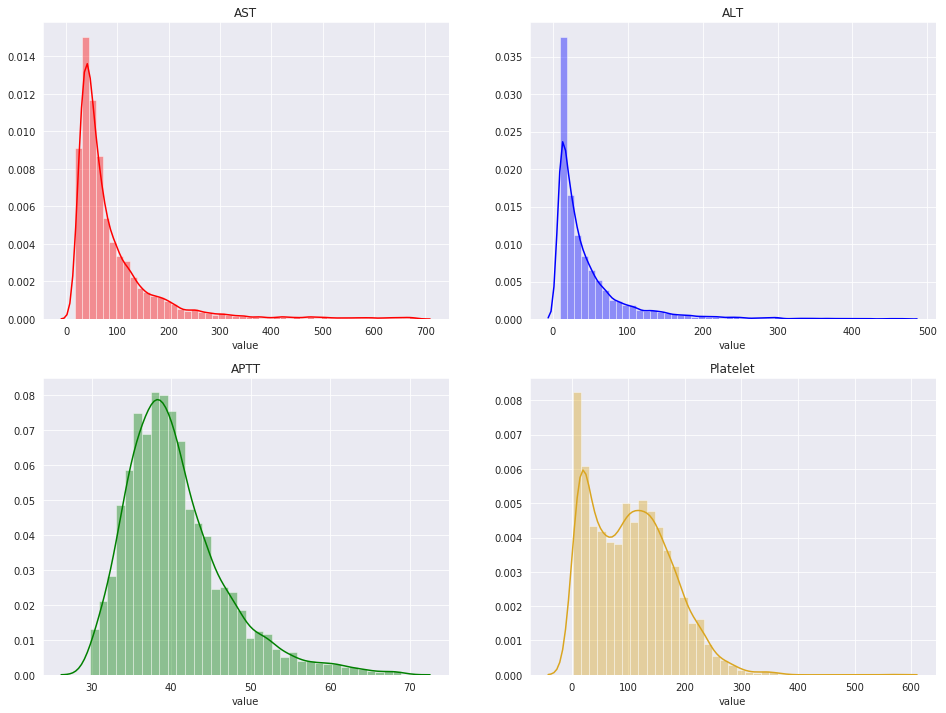

In [9]:
from matplotlib.pyplot import figure
figure(figsize = (16, 12))
sns.set_style('darkgrid')
plt.subplot(221)
plt.title("AST")
srt_AST = AST['value'].sort_values()
sns.distplot(srt_AST[10:5700], color = 'red')

plt.subplot(222)
plt.title("ALT")
srt_ALT = ALT['value'].sort_values()
sns.distplot(srt_ALT[100:8100], color = 'blue')

plt.subplot(223)
plt.title("APTT")
srt_APTT = APTT['value'].sort_values()
sns.distplot(srt_APTT[30:2400], color = 'green')
plt.subplot(224)
plt.title("Platelet")
srt_Platelet = Platelet['value'].sort_values()
sns.distplot(srt_Platelet, color = 'goldenrod')

In [10]:
older = data[data['age'] > 48]['is_hospitalization']
younger = data[data['age'] <= 48]['is_hospitalization']

nh = older.value_counts()[0]
h = older.value_counts()[1]
print("年長者住院機率： %.2f %%" % ((h/(nh+h))*100))

nh = younger.value_counts()[0]
h = younger.value_counts()[1]
print("年輕人住院機率： %.2f %%" % ((h/(nh+h))*100))

年長者住院機率： 20.82 %
年輕人住院機率： 5.92 %


## 全部年齡分佈

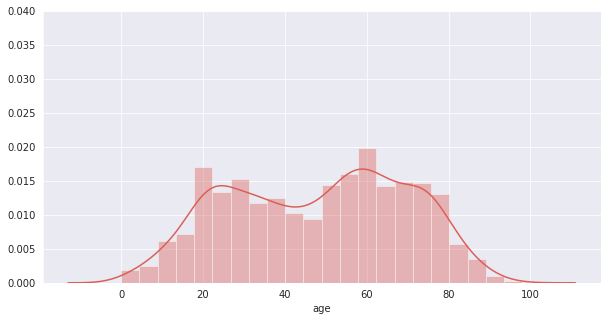

In [11]:
sns.set_palette("hls")
mpl.rc("figure", figsize=(10, 5))
plt.ylim(0, 0.04)
#data = randn(200)

sns.distplot(data['age'], norm_hist = False)



## 有住院和沒住院的年齡分佈
* 黃色：有住院，紅色：沒住院

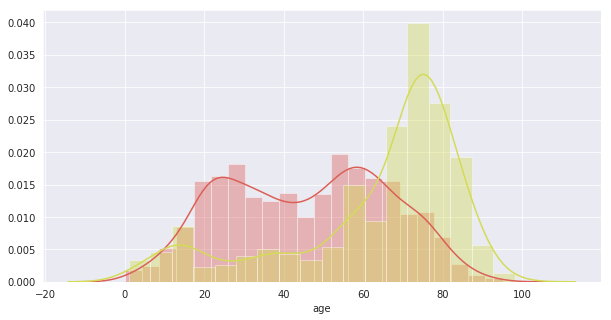

In [12]:
mpl.rc("figure", figsize=(10, 5))
h = data[data['is_hospitalization'] == 0]['age']
sns.distplot(h, norm_hist = True)
nh = data[data['is_hospitalization'] == 1]['age']
sns.distplot(nh, norm_hist = True)


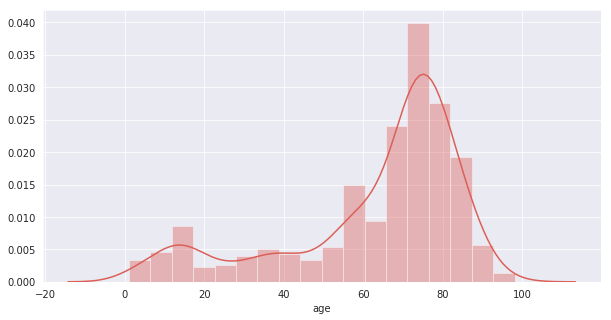

In [13]:
h = data[data['is_hospitalization'] == 1]['age']
sns.distplot(h)

## 各個資料和是否住院之關係

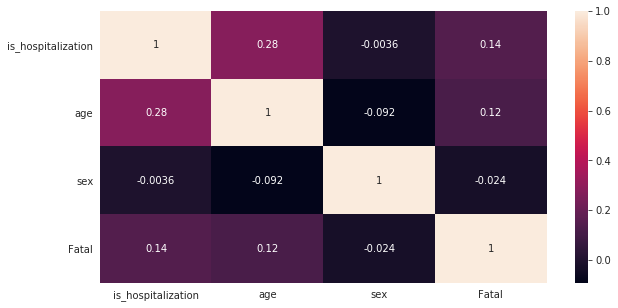

In [14]:
sns.heatmap(data[['is_hospitalization', 'age', 'sex', 'Fatal']].corr(), annot = True)

In [15]:
data['onset_month'] = pd.DatetimeIndex(data['onset_date']).month
data['diag_month'] = pd.DatetimeIndex(data['diag_date']).month
data.head()

,chartno,age,sex,onset_date,diag_date,death_date,is_hospitalization,Fatal,onset_month,diag_month
0,A1564,74,1,2015-08-31,2015-09-02,NaN,0,0,8,9
1,A1878,71,1,2015-09-09,2015-09-15,NaN,0,0,9,9
2,A8146,38,0,2015-08-11,2015-08-14,NaN,0,0,8,8
3,A8476,55,0,2015-09-17,2015-09-17,NaN,0,0,9,9
4,A15171,44,1,2015-09-28,2015-09-28,NaN,0,0,9,9


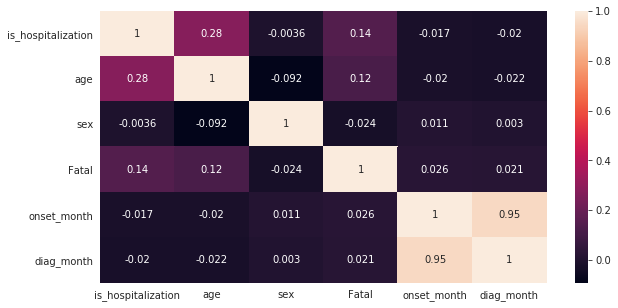

In [16]:
sns.heatmap(data[['is_hospitalization', 'age', 'sex', 'Fatal', 'onset_month', 'diag_month']].corr(), annot = True)

# 預測是否住院


## 用基本資料的dataset
### preprocessing

In [17]:
fix_data = data.drop(['chartno', 'onset_date', 'diag_date', 'death_date', 'Fatal'], axis = 1)
fix_data.head()
print(fix_data['is_hospitalization'].value_counts())

x = fix_data.drop('is_hospitalization', axis = 1)
y = fix_data['is_hospitalization']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.1)
xtrain.head()

0    3511
1     558
Name: is_hospitalization, dtype: int64


,age,sex,onset_month,diag_month
1989,64,1,9,9
1913,75,1,9,9
3539,74,1,9,9
987,52,1,9,9
2145,58,0,11,11


In [18]:
scaler = StandardScaler()
scaler.fit(xtrain)
xtrain_std = scaler.transform(xtrain)
xtest_std = scaler.transform(xtest)

print(xtrain_std)

/home/wayne/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/wayne/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


[[ 7.51860132e-01  9.85899511e-01  3.45095128e-04 -8.18829120e-02]
 [ 1.26236867e+00  9.85899511e-01  3.45095128e-04 -8.18829120e-02]
 [ 1.21595881e+00  9.85899511e-01  3.45095128e-04 -8.18829120e-02]
 ...
 [-2.03273192e+00  9.85899511e-01 -1.26339327e+00 -1.34709483e+00]
 [ 1.49441801e+00  9.85899511e-01  2.52782182e+00  2.44854092e+00]
 [ 1.03031934e+00  9.85899511e-01  3.45095128e-04 -8.18829120e-02]]


/home/wayne/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


## Baseline

In [19]:
print("%.2f %%" % ((1-ytest.mean())*100))

87.96 %


### Decision tree

In [20]:
dtree = DecisionTreeClassifier(max_depth = 4)
dtree.fit(xtrain, ytrain)

dot_data = StringIO()
export_graphviz(dtree, 
                out_file = dot_data,  
                filled = True, 
                feature_names = list(xtrain),
                class_names = ['h','nh'],
                special_characters = True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_pdf("tree.pdf")

print(dtree.feature_importances_)
predict = dtree.predict(xtest)
accuracy_score(ytest, predict)

[0.88113154 0.         0.02142604 0.09744243]


0.85995085995086

## SVM

In [21]:
svm = SVC()
svm.fit(xtrain, ytrain)

result = svm.predict(xtest)
acc_rate = accuracy_score(ytest, result)
print(acc_rate)
print(result)

0.8746928746928747
[0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


### Logistic Regression

In [22]:
LR = LogisticRegression()
LR.fit(xtrain, ytrain)

result = LR.predict(xtest)
acc_rate = accuracy_score(ytest, result)
print(acc_rate)
print(result)

0.8796068796068796
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


## merge AST
* 把AST的dataset merge起來做分析

In [23]:
ASTm = pd.merge(AST, data)
print(ASTm['is_hospitalization'].value_counts())
ASTm.head(5)

0    4394
1    1470
Name: is_hospitalization, dtype: int64


,chartno,type,Day,value,age,sex,onset_date,diag_date,death_date,is_hospitalization,Fatal,onset_month,diag_month
0,A10015442,1,4,39,36,1,2015-09-05,2015-09-07,NaN,0,0,9,9
1,A10017629,1,3,58,35,1,2015-09-10,2015-09-13,NaN,0,0,9,9
2,A10017629,1,6,61,35,1,2015-09-10,2015-09-13,NaN,0,0,9,9
3,A10030438,1,5,171,75,0,2015-09-07,2015-09-07,NaN,1,0,9,9
4,A10030438,1,7,132,75,0,2015-09-07,2015-09-07,NaN,1,0,9,9


In [24]:
fix_ASTm = ASTm.drop(['chartno', 'onset_date', 'diag_date', 'death_date', 'Fatal', 'type', 'Day'], axis = 1)
fix_ASTm.head()
print(fix_ASTm['is_hospitalization'].value_counts())

x = fix_ASTm.drop('is_hospitalization', axis = 1)
y = fix_ASTm['is_hospitalization']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.1)
xtrain.head()

0    4394
1    1470
Name: is_hospitalization, dtype: int64


,value,age,sex,onset_month,diag_month
1380,41,70,1,9,9
3260,41,59,0,10,11
113,56,68,1,9,10
2385,50,22,1,9,9
2955,76,31,1,9,9


## 預測

In [25]:
dtree = DecisionTreeClassifier(max_depth = 5)
dtree.fit(xtrain, ytrain)

dot_data = StringIO()
export_graphviz(dtree, 
                out_file = dot_data,  
                filled = True, 
                feature_names = list(xtrain),
                class_names = ['lose','win'],
                special_characters = True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_pdf("tree.pdf")

print(dtree.feature_importances_)
predict = dtree.predict(xtest)
accuracy_score(ytest, predict)


[0.24520584 0.70751445 0.00112453 0.02783464 0.01832053]


0.8126064735945485

## 再看看各個attributes和住院之關係
* 發現還是和年齡最有關系

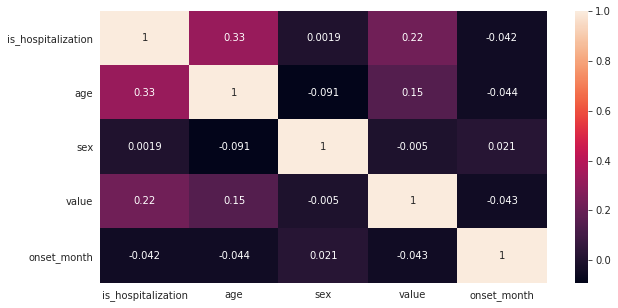

In [26]:
sns.heatmap(fix_ASTm[['is_hospitalization', 'age', 'sex', 'value', 'onset_month']].corr(), annot = True)

## 相同作法，merge ALT


In [27]:
ALTm = pd.merge(ALT, data)
print(ALTm['is_hospitalization'].value_counts())
ALT.head(5)

fix_ALTm = ALTm.drop(['chartno', 'onset_date', 'diag_date', 'death_date', 'Fatal', 'type', 'Day'], axis = 1)
fix_ALTm.head()
print(fix_ALTm['is_hospitalization'].value_counts())

x = fix_ALTm.drop('is_hospitalization', axis = 1)
y = fix_ALTm['is_hospitalization']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.1)
xtrain.head()

0    6365
1    1875
Name: is_hospitalization, dtype: int64
0    6365
1    1875
Name: is_hospitalization, dtype: int64


,value,age,sex,onset_month,diag_month
710,13,28,1,9,9
5175,39,48,1,8,8
6806,234,67,0,8,8
6993,10,50,0,9,9
3256,30,29,1,9,9


## 預測

In [28]:
dtree = DecisionTreeClassifier(max_depth = 5)
dtree.fit(xtrain, ytrain)

dot_data = StringIO()
export_graphviz(dtree, 
                out_file = dot_data,  
                filled = True, 
                feature_names = list(xtrain),
                class_names = ['lose','win'],
                special_characters = True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_pdf("tree.pdf")

print(dtree.feature_importances_)
predict = dtree.predict(xtest)
accuracy_score(ytest, predict)


[0.18440381 0.76731489 0.00375115 0.02892247 0.01560768]


0.8228155339805825


##  merge APTT

* 發現資料數顯著下降（資料不完整）

In [29]:
APTTm = pd.merge(APTT, data)
print(APTTm['is_hospitalization'].value_counts())

fix_APTTm = APTTm.drop(['chartno', 'onset_date', 'diag_date', 'death_date', 'Fatal', 'type', 'Day'], axis = 1)
fix_APTTm.head()
print(fix_APTTm['is_hospitalization'].value_counts())

x = fix_APTTm.drop('is_hospitalization', axis = 1)
y = fix_APTTm['is_hospitalization']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.1)
xtrain.head()

0    1759
1     668
Name: is_hospitalization, dtype: int64
0    1759
1     668
Name: is_hospitalization, dtype: int64


,value,age,sex,onset_month,diag_month
950,40.1,42,1,9,9
1780,37.8,35,1,9,9
521,37.8,7,1,8,8
475,43.8,71,1,10,10
927,34.5,28,0,8,8


In [30]:
dtree = DecisionTreeClassifier(max_depth = 4)
dtree.fit(xtrain, ytrain)

dot_data = StringIO()
export_graphviz(dtree, 
                out_file = dot_data,  
                filled = True, 
                feature_names = list(xtrain),
                class_names = ['lose','win'],
                special_characters = True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_pdf("tree.pdf")

print(dtree.feature_importances_)
predict = dtree.predict(xtest)
accuracy_score(ytest, predict)


[0.28219341 0.70850112 0.         0.00930547 0.        ]


0.7860082304526749

## merge platelet

In [31]:
Plateletm = pd.merge(Platelet, data)
print(Plateletm['is_hospitalization'].value_counts())
fix_Plateletm = Plateletm.drop(['Day', 'type', 'chartno', 'onset_date', 'diag_date', 'death_date', 'onset_month', 'diag_month'], axis = 1)

x = fix_Plateletm.drop('is_hospitalization', axis = 1)
y = fix_Plateletm['is_hospitalization']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.10)
print(xtrain.head())
print(ytrain.head())

0    2228
1    1454
Name: is_hospitalization, dtype: int64
      value  age  sex  Fatal
1789    303   49    0      0
47       18   85    0      0
2911      5   80    1      0
2325     31   78    0      0
65      126   18    0      0
1789    0
47      1
2911    1
2325    1
65      0
Name: is_hospitalization, dtype: int64


In [32]:
dtree = DecisionTreeClassifier(max_depth = 7)
dtree.fit(xtrain, ytrain)

dot_data = StringIO()
export_graphviz(dtree, 
                out_file = dot_data,  
                filled = True, 
                feature_names = list(xtrain),
                class_names = ['lose','win'],
                special_characters = True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_pdf("tree.pdf")

print(dtree.feature_importances_)
predict = dtree.predict(xtest)
accuracy_score(ytest, predict)

[0.30537745 0.67039311 0.01581648 0.00841295]


0.7940379403794038

In [33]:
LR = LogisticRegression()
LR.fit(xtrain, ytrain)

result = LR.predict(xtest)
acc_rate = accuracy_score(ytest, result)
print(acc_rate)
print(result)

0.7940379403794038
[1 1 1 0 0 0 1 0 1 1 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1
 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1
 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0
 1 1 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0
 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1
 1 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 1 1 1 1 0 0 1 1 0 1 0 0 1 1 1 0 0
 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 1 0 1 1 0 0 0 1 1 0 1 1 1
 0 1 1 1 1 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0]


In [34]:
svm = SVC()
svm.fit(xtrain, ytrain)

result = svm.predict(xtest)
acc_rate = accuracy_score(ytest, result)
print(acc_rate)
print(result)

0.7750677506775068
[1 1 1 0 1 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1
 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0
 1 1 1 0 1 0 0 1 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 1 0 0 1 0 0 1 0 1
 1 1 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 1 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1
 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0]


## merge AST ALT
* 原先想merge全部->發現資料數會少的無法用
* 只好merge AST, ALT


In [35]:
merge_all = pd.merge(data, AST)
merge_all = merge_all.rename(columns = {'value': 'AST'})

merge_all = pd.merge(merge_all, ALT)
merge_all = merge_all.rename(columns = {'value': 'ALT'})

#merge_all = pd.merge(merge_all, APTT)
#merge_all = merge_all.rename(columns = {'value': 'APTT'})

#merge_all = pd.merge(merge_all, Platelet)
#merge_all = merge_all.rename(columns = {'value': 'Platelet'})

merge_all.head()


,chartno,age,sex,onset_date,diag_date,death_date,is_hospitalization,Fatal,onset_month,diag_month,type,Day,AST,ALT
0,A8476,55,0,2015-09-17,2015-09-17,NaN,0,0,9,9,1,5,61,21
1,A8476,55,0,2015-09-17,2015-09-17,NaN,0,0,9,9,1,0,42,17
2,A15171,44,1,2015-09-28,2015-09-28,NaN,0,0,9,9,1,3,45,11
3,A15760,61,1,2015-09-07,2015-09-08,NaN,0,0,9,9,1,2,195,72
4,A20517,30,1,2015-09-14,2015-09-17,NaN,0,0,9,9,1,3,24,20


In [36]:
fix_data = merge_all.drop(['chartno', 'onset_date', 'diag_date', 'death_date'], axis = 1)
fix_data.head()
print(fix_data['is_hospitalization'].value_counts())

x = fix_data.drop('is_hospitalization', axis = 1)
y = fix_data['is_hospitalization']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.1)
xtrain.head()

0    4356
1    1447
Name: is_hospitalization, dtype: int64


,age,sex,Fatal,onset_month,diag_month,type,Day,AST,ALT
4123,76,1,0,9,9,1,4,244,124
5365,36,1,0,9,9,1,3,173,206
5482,29,0,0,9,9,1,5,51,10
1825,64,0,0,10,10,1,6,50,25
2506,13,0,0,9,9,1,5,57,10


## 發現AST/ALT重要性，新增此一欄位
* 分佈圖

count    5803.000000
mean        2.325409
std         1.619489
min         0.091085
25%         1.537752
50%         2.095745
75%         2.811655
max        86.584615
Name: AST/ALT, dtype: float64


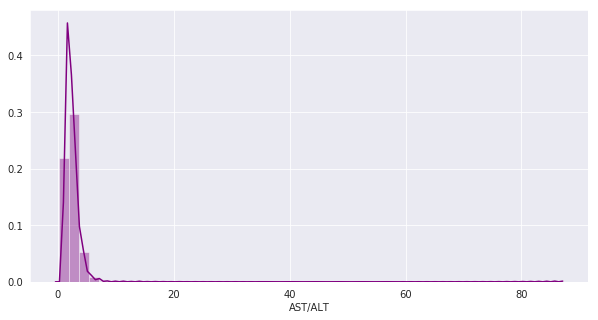

In [37]:
merge_all['AST/ALT'] = merge_all['AST']/merge_all['ALT']
print(merge_all['AST/ALT'].describe())

srt_merge_all = merge_all['AST/ALT'].sort_values()

#plt.hist(srt_merge_all)
sns.distplot(srt_merge_all, color = 'purple')

* 稍微看一下AST ALT數值的分佈

In [38]:
print(merge_all[merge_all['AST/ALT'] > 2.25]['is_hospitalization'].value_counts())
print(merge_all[merge_all['AST/ALT'] < 2.25]['is_hospitalization'].value_counts())
print('\n\n')
print(merge_all[merge_all['AST'] > merge_all['ALT']]['is_hospitalization'].value_counts())
print(merge_all[merge_all['AST'] < merge_all['ALT']]['is_hospitalization'].value_counts())

0    1796
1     734
Name: is_hospitalization, dtype: int64
0    2543
1     709
Name: is_hospitalization, dtype: int64



0    4063
1    1391
Name: is_hospitalization, dtype: int64
0    273
1     54
Name: is_hospitalization, dtype: int64


## 查看AST ALT大小和是否住院之關係

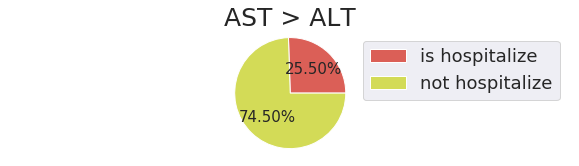

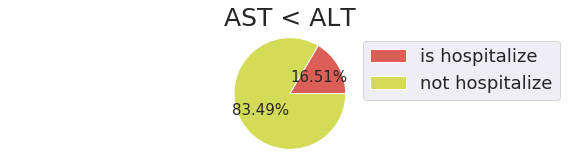

In [39]:
plt.subplot(211)
nhos = merge_all[merge_all['AST'] > merge_all['ALT']]['is_hospitalization'].value_counts()[0]
hos = merge_all[merge_all['AST'] > merge_all['ALT']]['is_hospitalization'].value_counts()[1]

label = ['is hospitalize', 'not hospitalize']

plt.pie([hos, nhos], autopct='%1.2f%%', textprops = {'fontsize':15})
plt.axis('equal')
plt.title('AST > ALT', fontsize = '25')
plt.legend(label, fontsize = '18')
plt.show()

plt.subplot(212)
nhos = merge_all[merge_all['AST'] < merge_all['ALT']]['is_hospitalization'].value_counts()[0]
hos = merge_all[merge_all['AST'] < merge_all['ALT']]['is_hospitalization'].value_counts()[1]

label = ['is hospitalize', 'not hospitalize']

plt.pie([hos, nhos], autopct='%1.2f%%', textprops = {'fontsize':15})
plt.axis('equal')
plt.title('AST < ALT', fontsize = '25')
plt.legend(label, fontsize = '18')
plt.show()



## AST/ALT數值分佈

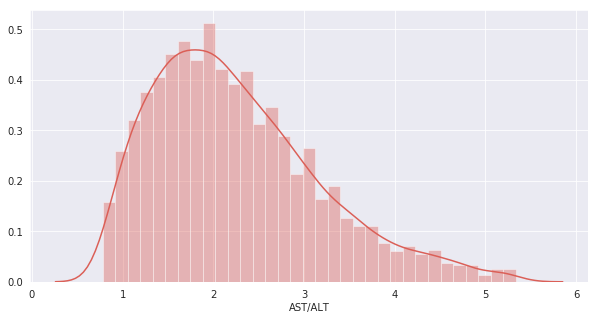

In [40]:
#mpl.rc("figure", figsize=(10, 5))
#sns.distplot(h, norm_hist = True)
v = merge_all['AST/ALT'].sort_values()
v = v[100:5700]
sns.distplot(v, norm_hist = True)

## AST/ALT數值和住院關係！

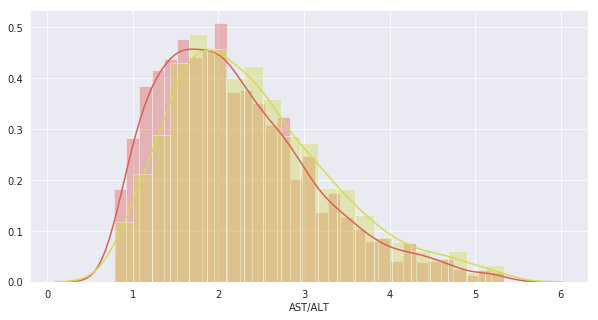

In [41]:
merge_all = merge_all.sort_values(by = ['AST/ALT'])
merge_all = merge_all[100:5700]

h = merge_all[merge_all['is_hospitalization'] == 0]['AST/ALT']
sns.distplot(h, norm_hist = True)
h = merge_all[merge_all['is_hospitalization'] == 1]['AST/ALT']
sns.distplot(h, norm_hist = True)


In [42]:
fix_merge_all = merge_all.drop(['type', 'chartno', 'onset_date', 'diag_date', 'death_date', 'Fatal', 'ALT', 'AST'], axis = 1)
print(fix_merge_all['is_hospitalization'].value_counts())

x = fix_merge_all.drop('is_hospitalization', axis = 1)
y = fix_merge_all['is_hospitalization']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.1)
xtrain.head()

0    4226
1    1374
Name: is_hospitalization, dtype: int64


,age,sex,onset_month,diag_month,Day,AST/ALT
3233,28,1,10,10,1,1.437500
5030,39,0,9,9,1,1.944444
4908,73,0,8,8,3,2.749881
2840,66,1,9,9,7,1.261538
72,56,1,10,10,7,1.547619


## 用AST/ALT預測！

In [43]:
dtree = DecisionTreeClassifier(max_depth = 5)
dtree.fit(xtrain, ytrain)

dot_data = StringIO()
export_graphviz(dtree, 
                out_file = dot_data,  
                filled = True, 
                feature_names = list(xtrain),
                class_names = ['h','nh'],
                special_characters = True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_pdf("tree.pdf")

print(dtree.feature_importances_)
predict = dtree.predict(xtest)
accuracy_score(ytest, predict)

[0.84367808 0.01882745 0.04392727 0.01146908 0.02681578 0.05528234]


0.8035714285714286


# 預測是否死亡
* 總之先全部預測不會死就99%了，感覺再train model意義偏小

In [44]:
nd = data['Fatal'].value_counts()[0]
d = data['Fatal'].value_counts()[1]

print("%.2f %%" % (nd/(d+nd)*100))

99.09 %


In [45]:
fix_data = data.drop(['chartno', 'onset_date', 'diag_date', 'death_date'], axis = 1)

x = fix_data.drop('Fatal', axis = 1)
y = fix_data['Fatal']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.1)
xtrain.head()

,age,sex,is_hospitalization,onset_month,diag_month
3946,24,0,0,10,10
3878,30,1,0,9,9
1208,90,1,0,9,9
3935,23,0,0,10,10
1191,60,1,0,9,9


* 死亡數樣本太少，做出來的東西沒什麼參考價值

In [46]:
dtree = DecisionTreeClassifier(max_depth = 4)
dtree.fit(xtrain, ytrain)

dot_data = StringIO()
export_graphviz(dtree, 
                out_file = dot_data,  
                filled = True, 
                feature_names = list(xtrain),
                class_names = ['h','nh'],
                special_characters = True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_pdf("tree.pdf")

print(dtree.feature_importances_)
predict = dtree.predict(xtest)
score = accuracy_score(ytest, predict)
print("%.3f %%" % (score*100))

[0.49575707 0.12328582 0.16600016 0.12036721 0.09458975]
99.263 %


In [47]:
data.sort_values(by = 'chartno')

,chartno,age,sex,onset_date,diag_date,death_date,is_hospitalization,Fatal,onset_month,diag_month
1903,A10015442,36,1,2015-09-05,2015-09-07,NaN,0,0,9,9
1904,A10017629,35,1,2015-09-10,2015-09-13,NaN,0,0,9,9
1905,A10030438,75,0,2015-09-07,2015-09-07,NaN,1,0,9,9
1906,A10031096,65,1,2015-08-19,2015-08-19,NaN,0,0,8,8
1907,A10034524,58,0,2015-09-25,2015-09-27,NaN,0,0,9,9
1908,A10036860,32,1,2015-09-17,2015-09-18,NaN,0,0,9,9
1909,A10056089,64,1,2015-09-28,2015-10-01,NaN,0,0,9,10
223,A1005710,75,0,2015-09-04,2015-09-07,NaN,0,0,9,9
1910,A10061241,36,1,2015-09-02,2015-09-03,NaN,0,0,9,9
1911,A10066095,73,0,2015-08-12,2015-08-12,NaN,1,0,8,8


In [48]:
Platelet.sort_values(by = 'chartno')

,chartno,type,Day,value
276,A10030438,1,3,13
278,A10030438,1,5,9
279,A10030438,1,7,11
280,A10030438,1,6,8
275,A10030438,1,2,33
274,A10030438,1,1,51
277,A10030438,1,4,12
617,A10031096,1,0,120
2461,A10034524,1,6,106
2460,A10034524,1,6,93
